# Initial Imports and Data Pipeline Setup. 
- Functions updated frequently
- DatafRame Pipeline for Exploratory Purposes

In [1]:
# Imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
pd.options.display.max_columns = None
pd.options.display.max_rows = None
#Import Date Converter uses regex to detect date/time columns
# Loads DataFrame
file = "../csv_files/All_data_with_exits.csv"
df = pd.read_csv(file)
# Column renaming 
df.columns = df.columns.str.replace(r'\d+.', '')

#Pipe setup. 
def start_pipeline(dataf):
  return dataf.copy()


#Set Data Types function accordingly
def set_dtypes(dataf):
  """Sets Data Type to specific columns"""
  dataf['Enroll Date'] = pd.to_datetime(dataf['Enroll Date'],infer_datetime_format=True)
  dataf['Exit Date'] = pd.to_datetime(dataf['Exit Date'],infer_datetime_format=True)
  dataf['CurrentDate'] = pd.to_datetime(dataf['CurrentDate'],infer_datetime_format=True)
  dataf['Date of First Contact (Beta)'] = pd.to_datetime(dataf['Date of First Contact (Beta)'],infer_datetime_format=True)
  dataf['Date of First ES Stay (Beta)'] = pd.to_datetime(dataf['Date of First ES Stay (Beta)'],infer_datetime_format=True)
  dataf['Date of Last Contact (Beta)'] = pd.to_datetime(dataf['Date of Last Contact (Beta)'],infer_datetime_format=True)
  dataf['Date of Last ES Stay (Beta)'] = pd.to_datetime(dataf['Date of Last ES Stay (Beta)'],infer_datetime_format=True)
  dataf['Engagement Date'] = pd.to_datetime(dataf['Engagement Date'],infer_datetime_format=True)
  dataf['Homeless Start Date'] = pd.to_datetime(dataf['Homeless Start Date'],infer_datetime_format=True)
  return dataf

# Use apply to assign values in dataframe to categories

def recategorization(dataf):
  values_dict = {
    # Permanent Exits
    'Staying or living with family, permanent tenure' : 'Permanent Exit',
    'Staying or living with friends, permanent tenure' : 'Permanent Exit',
    'Permanent housing (other than RRH) for formerly homeless persons' : 'Permanent Exit',
    'Rental by client with RRH or equivalent subsidy' : 'Permanent Exit',
    'Rental by client, no ongoing housing subsidy' : 'Permanent Exit',
    'Rental by client, other ongoing housing subsidy' : 'Permanent Exit',
    'Owned by client, no ongoing housing subsidy' : 'Permanent Exit',
    # Temporary Exits
    'Place not meant for habitation (e.g., a vehicle, an abandoned building, bus/train/subway station/airport or anywhere outside)' : 'Unknown/Other',
    'Staying or living with family, temporary tenure (e.g., room, apartment or house)' : 'Temporary Exit',
    'Staying or living with friends, temporary tenure (e.g., room, apartment or house)' : 'Temporary Exit',
    'Hotel or Motel paid for without Emergency Shelter Voucher' : 'Temporary Exit',
    # Emergency Shelter
    'Emergency shelter, including hotel or motel paid for with emergency shelter voucher, or RHY-funded Host Home shelter' : 'Emergency Shelter',
    # Transitional Housing
    'Transitional Housing for homeless persons (including homeless youth)' : 'Transitional Housing',
    'Safe Haven' : 'Transitional Housing',
    'Substance Abuse Treatment or Detox Center' : 'Transitional Housing',
    'Foster Care Home or Foster Care Group Home' : 'Transitional Housing',
    'Psychiatric Hospital or Other Psychiatric Facility' : 'Transitional Housing',
    # Unknown/Other
    'No exit interview completed' : 'Unknown/Other',
    'Client refused' : 'Unknown/Other',
    'Other' : 'Unknown/Other',
    'Client doesn\'t know' : 'Unknown/Other',
    np.NaN : 'Unknown/Other'
    }
  dataf['Recategorized'] = dataf['Exit Destination'].map(values_dict)
  return dataf

<ipython-input-1-c29c6aed8230>:13: FutureWarning: The default value of regex will change from True to False in a future version.
  df.columns = df.columns.str.replace(r'\d+.', '')


In [2]:
# Pipeline Application
cleaned_df = df.pipe(start_pipeline).pipe(set_dtypes).pipe(recategorization)
# Prints Resuls to show that the functions worked. 
print(cleaned_df['Enroll Date'].dtypes)
print(cleaned_df['Exit Date'].dtypes)
print(cleaned_df['CurrentDate'].dtypes)
print(cleaned_df['Date of First Contact (Beta)'].dtypes)
print(cleaned_df['Date of First ES Stay (Beta)'].dtypes)
print(cleaned_df['Date of Last Contact (Beta)'].dtypes)
print(cleaned_df['Date of Last ES Stay (Beta)'].dtypes)
print(cleaned_df['Engagement Date'].dtypes)
print(cleaned_df['Homeless Start Date'].dtypes)
print(cleaned_df['Recategorized'].value_counts(dropna=False))

datetime64[ns]
datetime64[ns]
datetime64[ns]
datetime64[ns]
datetime64[ns]
datetime64[ns]
datetime64[ns]
datetime64[ns]
datetime64[ns]
Unknown/Other           642
Permanent Exit          592
Emergency Shelter       391
Temporary Exit          140
Transitional Housing     97
Name: Recategorized, dtype: int64


# Data Exploration 
- No specific format 
- Section for Analyzing and Experimenting

In [3]:
df['ProjectType'].value_counts()

Emergency shelter    1862
Name: ProjectType, dtype: int64

In [4]:
cleaned_df.describe()

,Personal ID,Household ID,CaseMembers,Age at Enrollment,Current Age,Stayed Less Than Nights,Stayed Less Than Days,"Stayed in Streets, ES or SH Night Before",Length of Time Homeless (Approximate Start),VZip,Days Enrolled in Project,RRH In Permanent Housing,RRH Date Of Move-In,In School (Retired Data Element),Latitude,Longitude,RReferral Source,RDate Status Determined,REnroll Status,RRunaway Youth,RReason Why No Services Funded,RSexual Orientation,RGeneral Health Status,RDental Health Status,RMental Health Status,RPregnancy Status,RPregnancy Due Date,InfoReleaseNo,Contact Services,Count of Bed Nights (Housing Check-ins),Income Total at Entry,Total Income at Annual Update,Income Total at Exit,Non-Cash Benefit Count,Non-Cash Benefit Count at Exit,Barrier Count at Entry,Chronic Homeless Status,ProgramType,SOAR Enrollment Determination (Most Recent),ClientID,CaseChildren,CaseAdults,Bed Nights During Report Period,Count of Bed Nights - Entire Episode,HEN-HP Referral Most Recent,HEN-RRH Referral Most Recent,WorkSource Referral Most Recent,YAHP Referral Most Recent,Earned Income,Unemployment Insurance,Supplemental Security Income,Social Security Disability Income,VA Disability Compensation,VA Disability Pension,Private Disability Income,Workers Compensation,TANF,General Assistance,Retirement (Social Security),Pension from a Former Job,Child Support,Alimony,Other Income,Chronic Homeless Status_vHMISDatAssessment,Chronic Homeless Status_EvaluatevHMIS&HMISDA
count,1862.000000,1862.000000,1862.000000,1862.000000,1862.000000,0.0,0.0,0.0,906.000000,521.000000,1862.000000,0.0,0.0,0.0,72.000000,72.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1854.000000,1862.000000,1862.000000,376.000000,3.000000,430.000000,1862.000000,1862.000000,1862.000000,1862.000000,1862.0,0.0,1862.0,1862.000000,1862.000000,1755.000000,1755.000000,0.0,0.0,0.0,0.0,1862.000000,1862.000000,1862.000000,1862.000000,1862.000000,1862.0,1862.000000,1862.000000,1862.00000,1862.000000,1862.0,1862.0,1862.000000,1862.0,1862.000000,1862.000000,1862.000000
mean,79080.234694,111716.666488,3.720730,19.899033,21.442535,NaN,NaN,NaN,215.546358,92862.009597,47.462943,NaN,NaN,NaN,47.678138,-117.393425,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,498.648328,2.909774,29.372718,854.225399,464.333333,885.635860,0.312030,0.348013,0.495704,0.035446,1.0,NaN,1.0,2.055317,1.665414,28.835328,31.163533,NaN,NaN,NaN,NaN,68.206477,2.957573,28.965677,17.393126,2.852309,0.0,0.105800,0.784103,42.43609,0.706767,0.0,0.0,3.670354,0.0,4.418367,0.038131,0.038131
std,19157.736692,10969.031505,1.478264,15.551979,15.589497,NaN,NaN,NaN,414.637370,15476.113160,52.785286,NaN,NaN,NaN,0.060348,0.078696,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21.962052,7.585544,42.000354,614.322920,463.034916,634.800232,0.553291,0.549773,0.948843,0.184953,0.0,NaN,0.0,1.360236,0.540937,39.417418,42.612224,NaN,NaN,NaN,NaN,338.315250,59.163385,196.573051,119.018637,71.869981,0.0,4.565374,33.834754,147.10562,23.665748,0.0,0.0,42.600982,0.0,62.073699,0.191564,0.191564
min,11506.000000,88364.000000,1.000000,0.000000,0.000000,NaN,NaN,NaN,-201.000000,12866.000000,0.000000,NaN,NaN,NaN,47.501607,-117.736829,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,142.000000,0.000000,0.000000,0.000000,197.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,NaN,1.0,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.00000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000
25%,74024.250000,102697.750000,3.000000,6.000000,7.000000,NaN,NaN,NaN,35.000000,98841.000000,8.000000,NaN,NaN,NaN,47.656305,-117.431116,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,500.000000,0.000000,2.000000,459.000000,197.000000,459.000000,0.000000,0.000000,0.000000,0.000000,1.0,NaN,1.0,1.000000,1.000000,2.000000,2.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.00000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000
50%,84869.500000,109777.500000,3.000000,1

In [5]:
cleaned_df['VZip'].value_counts()

99201.0    61
99207.0    58
99206.0    36
99205.0    31
99202.0    26
99208.0    24
99001.0    14
99037.0    13
99217.0    12
99223.0    11
99224.0    10
99216.0     9
99212.0     8
53206.0     7
99204.0     7
98501.0     6
99006.0     6
99004.0     6
99022.0     6
46767.0     5
99114.0     5
99109.0     4
52001.0     4
83647.0     4
45822.0     4
95401.0     4
59832.0     4
99141.0     4
93308.0     4
84401.0     4
96007.0     4
99156.0     4
99362.0     3
21244.0     3
59405.0     3
71301.0     3
99203.0     3
83651.0     3
99218.0     3
99133.0     3
99169.0     3
99163.0     3
99019.0     3
98837.0     3
84111.0     3
99213.0     2
58801.0     2
99016.0     2
32640.0     2
74953.0     2
98548.0     2
98208.0     2
83854.0     2
84721.0     2
98374.0     2
83843.0     2
83301.0     2
99336.0     1
59417.0     1
98661.0     1
78217.0     1
98841.0     1
85029.0     1
46619.0     1
83858.0     1
59601.0     1
33905.0     1
86333.0     1
97141.0     1
99157.0     1
34957.0     1
99220.

In [6]:
cleaned_df['VZip'].isnull().sum()

1341

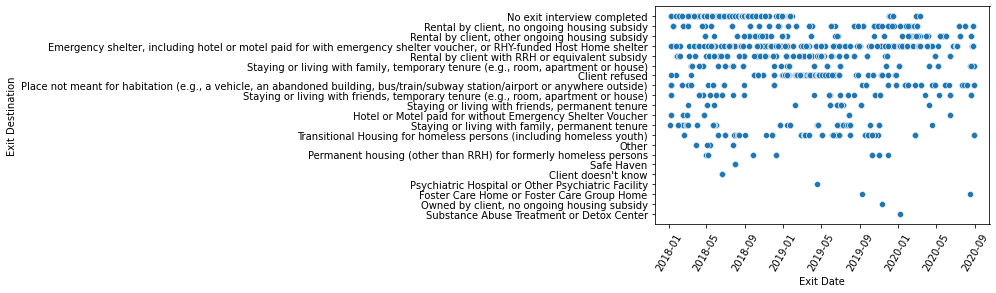

In [7]:
g = sns.scatterplot(data=cleaned_df,y='Exit Destination',x='Exit Date')
for item in g.get_xticklabels():
    item.set_rotation(60)

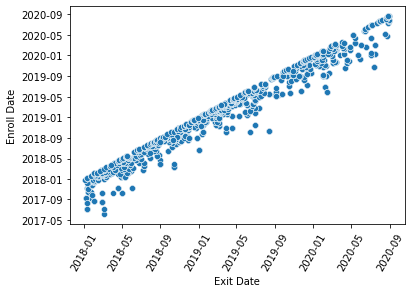

In [8]:
e = sns.scatterplot(data=cleaned_df,y='Enroll Date',x='Exit Date')
for item in e.get_xticklabels():
    item.set_rotation(60)

In [9]:
cleaned_df['Exit Destination'].value_counts()

Emergency shelter, including hotel or motel paid for with emergency shelter voucher, or RHY-funded Host Home shelter             391
No exit interview completed                                                                                                      269
Client refused                                                                                                                   218
Rental by client with RRH or equivalent subsidy                                                                                  196
Rental by client, no ongoing housing subsidy                                                                                     138
Rental by client, other ongoing housing subsidy                                                                                  121
Transitional Housing for homeless persons (including homeless youth)                                                              89
Place not meant for habitation (e.g., a vehicle, an abandoned buildin

# Target Recategorization


Because the target is initially recorded in a very granular manner, the target labels will need to be recategorized to fit into the 5 Categories provided by stakeholder

- Permanent Exit
- Temporary Exit
- Emergency Shelter
- Transitional Housing
- Unknown/Other

**Permanent Exit**

- Staying or living with family, permanent tenure
- Staying or living with friends, permanent tenure
- Permanent housing (other than RRH) for formerly homeless persons
- Rental by client with RRH or equivalent subsidy
- Rental by client, no ongoing housing subsidy
- Rental by client, other ongoing housing subsidy
- Owned by client, no ongoing housing subsidy

**Temporary Exit**  


- Staying or living with family, temporary tenure (e.g., room, apartment or house)
- Staying or living with friends, temporary tenure (e.g., room, apartment or house)
- Hotel or Motel paid for without Emergency Shelter Voucher

**Emergency Shelter**  

- Emergency shelter, including hotel or motel paid for with emergency shelter voucher, or RHY-funded Host Home shelter 

**Transitional Housing**  

- Transitional Housing for homeless persons (including homeless youth)
- Safe Haven
- Substance Abuse Treatment or Detox Center
- Foster Care Home or Foster Care Group Home
- Psychiatric Hospital or Other Psychiatric Facility

**Unknown/Other**
- Place not meant for habitation (e.g., a vehicle, an abandoned building, bus/train/subway station/airport or anywhere outside)
- No exit interview completed
- Client refused
- Other
- Client doesn't know

# Data Exploration Continued

In [10]:
cleaned_df['Recategorized'].value_counts(dropna=False)

Unknown/Other           642
Permanent Exit          592
Emergency Shelter       391
Temporary Exit          140
Transitional Housing     97
Name: Recategorized, dtype: int64

In [11]:
cleaned_df.isnull().sum()

Organization Name                                   0
Project Name                                        0
ProjectType                                         0
Utilization Tracking Method (Invalid)               0
Federal Grant Programs                            107
Personal ID                                         0
Household ID                                        0
Relationship to HoH                                 0
Client Location                                  1296
CaseMembers                                         0
Enroll Date                                         0
Exit Date                                          66
Exit Destination                                   66
Social Security Quality                             0
Birthdate Quality                                   0
Age at Enrollment                                   0
Current Age                                         0
Race                                                3
Ethnicity                   

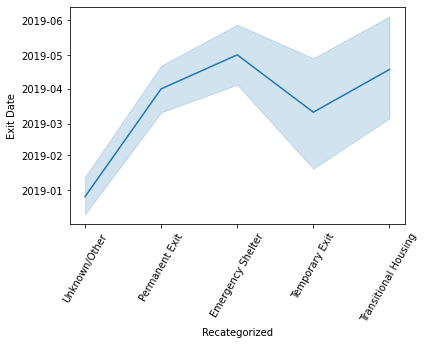

In [12]:
f = sns.lineplot(data=cleaned_df,y='Exit Date',x='Recategorized')
for item in f.get_xticklabels():
    item.set_rotation(60)

<AxesSubplot:>

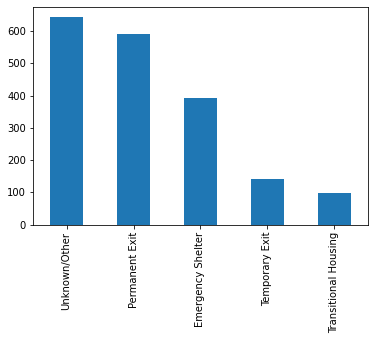

In [13]:
cleaned_df['Recategorized'].value_counts().plot(kind='bar')

In [14]:
cleaned_df.shape

(1862, 144)

In [15]:
cleaned_df.describe(exclude='number',datetime_is_numeric=True)

,Organization Name,Project Name,ProjectType,Utilization Tracking Method (Invalid),Federal Grant Programs,Relationship to HoH,Client Location,Enroll Date,Exit Date,Exit Destination,Social Security Quality,Birthdate Quality,Race,Ethnicity,Gender,Veteran Status,Disabling Condition at Entry,Living Situation,Length of Stay,Homeless Start Date,Times Homeless Last Years,Total Months Homeless Last Years,VLast Permanent Address,VState,Municipality (City or County),Days Enrolled Until RRH Date of Move-in,Housing Status,Covered by Health Insurance,Domestic Violence,Domestic Violence - Currently Fleeing DV?,Domestic Violence - When it Occurred,Engagement Date,Days Enrolled Until Engagement Date,Current Status (Retired Data Element),Connected to McKinney Vento Liason (Retired),Household Type,RLast Grade Completed,RSchool Status,REmployed Status,RWhy Not Employed,RType of Employment,RLooking for Work,Client Record Restricted,Information Release Status,Date of Last Contact (Beta),Date of First Contact (Beta),Date of Last ES Stay (Beta),Date of First ES Stay (Beta),CurrentDate,SOAR Eligibility Determination (Most Recent),RRH | Most Recent Enrollment,Street Outreach | Most Recent Enrollment,Coordinated Entry | Most Recent Enrollment,Emergency Shelter | Most Recent Enrollment,Transitional Housing | Most Recent Enrollment,PSH | Most Recent Enrollment,Prevention | Most Recent Enrollment,Under Years Old,Alcohol Abuse (Substance Abuse),Chronic Health Condition,Developmental Disability,Drug Abuse (Substance Abuse),HIV/AIDS,Mental Health Problem,Physical Disability,Other Public,State Funded,Indian Health Services (IHS),Other,Combined Childrens HealthInsurance/Medicaid,Medicaid,Medicare,State Children's health Insurance S-CHIP,Veteran's Administration Medical Services,Health Insurance obtained through COBRA,Private - Employer,Private,Private - Individual,Recategorized
count,1862,1862,1862,1862,1755,1862,566,1862,1796,1796,1862,1862,1859,1859,1862,954,1862,906,906,906,902,906,670,521,50,1862,906,1755,717,107,107,482,1862,402,207,1862,367,256,380,362,19,1,1862,1862,1277,1277,1639,1639,1862,19,1051,76,1538,1862,181,33,71,1862,41,206,150,72,1,307,146,1616,1616,1616,1616,1616,1616,1616,1616,1616,1616,1616,1616,1616,1862
unique,1,2,1,2,1,10,1,NaN,NaN,21,5,2,9,5,4,3,6,15,9,NaN,7,16,5,23,5,1,6,5,3,2,6,NaN,35,4,5,3,11,8,2,3,3,1,2,2,NaN,NaN,NaN,NaN,NaN,12,295,56,421,582,69,14,29,2,1,1,1,1,1,1,1,2,2,2,2,2,2,2,2,2,1,2,2,1,5
top,Family Promise of Spokane,FPS--ES--Open Doors,Emergency shelter,Night-by-Night (nbn),NAA,Self,Spokane City & County CoC,NaN,NaN,"Emergency shelter, including hotel or motel pa...",Full SSN,Full DOB Reported,White,Non-Hispanic/Latino,Female,No,No,Place not meant for habitation,Two to six nights,NaN,One time,More than 12 months,Full address reported,WA,Spokane,No Move-In Date,Category 1 - Homeless,Yes,No,Yes,Within the past three months,NaN,No Engagement Date,Yes,No,Household with Adults and Children,Nursery School to 4th Grade,Attending school regularly,No,Unable to work,Full-Time,Yes,True,Client may be seen by others,NaN,NaN,NaN,NaN,NaN,SOAR Eligibility Determination - Service Date:...,05/07/2020 - 05/27/2020: CC--RRH--WA0353--RRH ...,08/21/2019 - 12/04/2019: Transitions--SSO--WA0...,01/29/2020 - Current: CC--CA-HFCA,05/06/2018 - 05/26/2018: FPS--ES--Open Doors,11/28/2018 - 04/15/2019: TSA--TH--Stepping Stones,05/31/2019 - Current: HCHV--PSH--VASH,12/08/2017 - 07/11/2018: GI--SSVF--Priority I--HP,Yes,Alcohol Abuse,Chronic Health,Developmental Disability,Drug Abuse,HIV/AIDS,Mental Illness,Physical Disability,No,Yes,No,No,No,No,No,No,No,No,No,No,No,Unknown/Other
freq,1862,1755,1862,1755,1755,576,566,NaN,NaN,391,919,1601,1164,1635,982,925,1332,303,188,NaN,404,240,328,412,42,1862,871,1521,577,92,53,NaN,1380,229,92,1737,141,159,362,235,11,1,1372,1847,NaN,NaN,NaN,NaN,NaN,3,12,4,18,14,10,6,11,1051,41,206,150,72,1,307,146,1615,842,1607,1601,1610,923,1592,1572,1612,1616,1609,1605,1616,642
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-02-06 23:19:00.7089152

In [16]:
cleaned_df.tail()

,Organization Name,Project Name,ProjectType,Utilization Tracking Method (Invalid),Federal Grant Programs,Personal ID,Household ID,Relationship to HoH,Client Location,CaseMembers,Enroll Date,Exit Date,Exit Destination,Social Security Quality,Birthdate Quality,Age at Enrollment,Current Age,Race,Ethnicity,Gender,Veteran Status,Disabling Condition at Entry,Living Situation,Stayed Less Than Nights,Stayed Less Than Days,"Stayed in Streets, ES or SH Night Before",Length of Stay,Homeless Start Date,Length of Time Homeless (Approximate Start),Times Homeless Last Years,Total Months Homeless Last Years,VLast Permanent Address,VState,VZip,Municipality (City or County),Days Enrolled in Project,RRH In Permanent Housing,RRH Date Of Move-In,Days Enrolled Until RRH Date of Move-in,Housing Status,Covered by Health Insurance,Domestic Violence,Domestic Violence - Currently Fleeing DV?,Domestic Violence - When it Occurred,Engagement Date,Days Enrolled Until Engagement Date,Current Status (Retired Data Element),In School (Retired Data Element),Connected to McKinney Vento Liason (Retired),Household Type,Latitude,Longitude,RReferral Source,RDate Status Determined,REnroll Status,RRunaway Youth,RReason Why No Services Funded,RSexual Orientation,RLast Grade Completed,RSchool Status,REmployed Status,RWhy Not Employed,RType of Employment,RLooking for Work,RGeneral Health Status,RDental Health Status,RMental Health Status,RPregnancy Status,RPregnancy Due Date,Client Record Restricted,InfoReleaseNo,Information Release Status,Contact Services,Date of Last Contact (Beta),Date of First Contact (Beta),Count of Bed Nights (Housing Check-ins),Date of Last ES Stay (Beta),Date of First ES Stay (Beta),Income Total at Entry,Total Income at Annual Update,Income Total at Exit,Non-Cash Benefit Count,Non-Cash Benefit Count at Exit,CurrentDate,Barrier Count at Entry,Chronic Homeless Status,ProgramType,SOAR Eligibility Determination (Most Recent),SOAR Enrollment Determination (Most Recent),RRH | Most Recent Enrollment,Street Outreach | Most Recent Enrollment,Coordinated Entry | Most Recent Enrollment,Emergency Shelter | Most Recent Enrollment,Transitional Housing | Most Recent Enrollment,PSH | Most Recent Enrollment,Prevention | Most Recent Enrollment,Under Years Old,ClientID,Alcohol Abuse (Substance Abuse),Chronic Health Condition,Developmental Disability,Drug Abuse (Substance Abuse),HIV/AIDS,Mental Health Problem,Physical Disability,CaseChildren,CaseAdults,Bed Nights During Report Period,Count of Bed Nights - Entire Episode,HEN-HP Referral Most Recent,HEN-RRH Referral Most Recent,WorkSource Referral Most Recent,YAHP Referral Most Recent,Other Public,State Funded,Indian Health Services (IHS),Other,Combined Childrens HealthInsurance/Medicaid,Medicaid,Medicare,State Children's health Insurance S-CHIP,Veteran's Administration Medical Services,Health Insurance obtained through COBRA,Private - Employer,Private,Private - Individual,Earned Income,Unemployment Insurance,Supplemental Security Income,Social Security Disability Income,VA Disability Compensation,VA Disability Pension,Private Disability Income,Workers Compensation,TANF,General Assistance,Retirement (Social Security),Pension from a Former Job,Child Support,Alimony,Other Income,Chronic Homeless Status_vHMISDatAssessment,Chronic Homeless Status_EvaluatevHMIS&HMISDA,Recategorized
1857,Family Promise of Spokane,FPS--ES--Open Doors,Emergency shelter,Night-by-Night (nbn),NAA,101420,131395,Significant Other (Non-Married),NaN,4,2020-08-27,NaT,NaN,Full SSN,Full DOB Reported,39,39,White,Non-Hispanic/Latino,Male,No,No,Place not meant for habitation,NaN,NaN,NaN,"One week or more, but less than one month",2020-08-19,13.0,One time,One month (this time is the first month),NaN,NaN,NaN,NaN,5,NaN,NaN,No Move-In Date,NaN,No,No,NaN,NaN,NaT,No Engagement Date,NaN,NaN,NaN,Household with Adults and Children,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,500.0,Client may be seen by others,0,NaT,NaT,4,2020-08-

In [17]:
cleaned_df['Housing Status'].value_counts()

Category 1 - Homeless                                      871
Category 2 - At imminent risk of losing housing             15
Category 4 - Fleeing domestic violence                      13
At-risk of homelessness                                      3
Category 3 - Homeless only under other federal statutes      2
Client refused                                               2
Name: Housing Status, dtype: int64

In [18]:
cleaned_df['ProjectType'].value_counts()

Emergency shelter    1862
Name: ProjectType, dtype: int64

<AxesSubplot:>

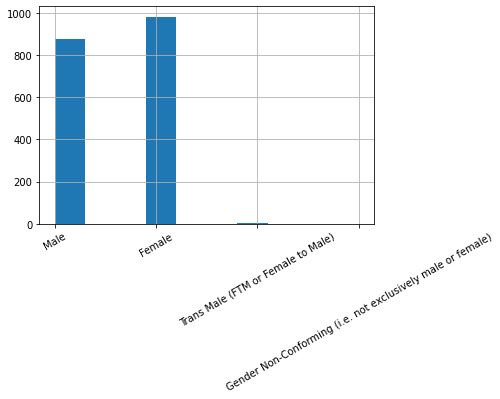

In [19]:
cleaned_df['Gender'].hist(xrot=30)

In [20]:
cleaned_df['Gender'].value_counts(dropna=False)

Female                                                         982
Male                                                           877
Trans Male (FTM or Female to Male)                               2
Gender Non-Conforming (i.e. not exclusively male or female)      1
Name: Gender, dtype: int64

<AxesSubplot:>

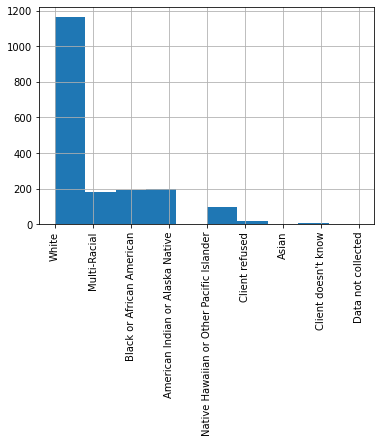

In [21]:
cleaned_df['Race'].hist(xrot=90)

In [22]:
cleaned_df['Race'].value_counts(dropna=False)

White                                        1164
American Indian or Alaska Native              196
Black or African American                     191
Multi-Racial                                  182
Native Hawaiian or Other Pacific Islander      97
Client refused                                 20
Client doesn't know                             5
NaN                                             3
Asian                                           3
Data not collected                              1
Name: Race, dtype: int64

<AxesSubplot:>

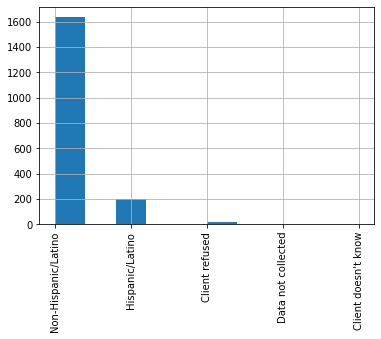

In [23]:
cleaned_df['Ethnicity'].hist(xrot=90)

In [24]:
cleaned_df['Ethnicity'].value_counts(dropna=False)

Non-Hispanic/Latino    1635
Hispanic/Latino         204
Client refused           17
NaN                       3
Client doesn't know       2
Data not collected        1
Name: Ethnicity, dtype: int64

# Reorganizing and Feature Selection for Base Model 

In [25]:
cleaned_df.dtypes

Organization Name                                        object
Project Name                                             object
ProjectType                                              object
Utilization Tracking Method (Invalid)                    object
Federal Grant Programs                                   object
Personal ID                                               int64
Household ID                                              int64
Relationship to HoH                                      object
Client Location                                          object
CaseMembers                                               int64
Enroll Date                                      datetime64[ns]
Exit Date                                        datetime64[ns]
Exit Destination                                         object
Social Security Quality                                  object
Birthdate Quality                                        object
Age at Enrollment                       

In [26]:
cleaned_df.shape

(1862, 144)

In [27]:
cleaned_df['Recategorized'].value_counts(normalize=True)

Unknown/Other           0.344791
Permanent Exit          0.317938
Emergency Shelter       0.209989
Temporary Exit          0.075188
Transitional Housing    0.052095
Name: Recategorized, dtype: float64

In [28]:
cleaned_df[' Alimony'].head()

0    0
1    0
2    0
3    0
4    0
Name:  Alimony, dtype: int64

In [29]:
# Feature Selection Experimentation 

columns = ['Personal ID','Household ID','Relationship to HoH','Client Location',
           'CaseMembers','Enroll Date', 'Exit Date','Exit Destination',
           'Social Security Quality','Birthdate Quality', 'Race', 'Ethnicity',
           'Gender', 'Homeless Start Date', 'VState', 'VZip', 
           'Municipality (City or County)', 'RRH Date Of Move-In',
           'Domestic Violence', 'Domestic Violence - Currently Fleeing DV?',
           'Domestic Violence - When it Occurred', 'Engagement Date', 
           'Date of Last Contact (Beta)', 'Date of First Contact (Beta)', 
           'Date of Last ES Stay (Beta)', 'Date of First ES Stay (Beta)', 
           'CurrentDate', 'Chronic Homeless Status_vHMISDatAssessment',
           'Chronic Homeless Status_EvaluatevHMIS&HMISDA']
train = cleaned_df.drop(columns=columns,axis=1)
train.shape

(1862, 115)

In [30]:
y = train['Recategorized']
X = train.drop(columns=['Recategorized'],axis = 1)

In [31]:
!pip install category_encoders

# Basic Models Tests
- Random Forest
- (more to add)

In [32]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from category_encoders import OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

In [33]:
X_train,X_val,y_train,y_val = train_test_split(X,y,train_size = 0.8, test_size=0.2,random_state=42)

In [34]:
X_train.shape, X_val.shape,y_train.shape,y_val.shape

((1489, 114), (373, 114), (1489,), (373,))

In [35]:
model_random = Pipeline([('ord', OrdinalEncoder()),
                         ('imputer', SimpleImputer()),
                         ('classifier',RandomForestClassifier(random_state=42))]
                        )

In [36]:
model_random.fit(X_train,y_train)

Pipeline(steps=[('ord',
                 OrdinalEncoder(cols=['Organization Name', 'Project Name',
                                      'ProjectType',
                                      'Utilization Tracking Method (Invalid)',
                                      'Federal Grant Programs',
                                      'Veteran Status',
                                      'Disabling Condition at Entry',
                                      'Living Situation', 'Length of Stay',
                                      'Times Homeless Last Years',
                                      'Total Months Homeless Last Years',
                                      'VLast Permanent Address',
                                      'Days Enrolled Until RRH Date of Move-in',
                                      'Housi...
08/24/2020 - Current: SNAP--CA--SHCA       394
01/16/2020 - Current: SNAP--CA--SHCA       395
05/20/2018 - 12/31/2018: CC--CA-HFCA       396
11/01/2018 - 12/31/2018: CC

In [37]:
model_random.score(X_train,y_train)

1.0

In [38]:
model_random.predict_proba(X_val)

array([[0.2 , 0.19, 0.  , 0.09, 0.52],
       [0.11, 0.15, 0.07, 0.  , 0.67],
       [0.11, 0.04, 0.01, 0.01, 0.83],
       ...,
       [0.17, 0.04, 0.05, 0.06, 0.68],
       [0.13, 0.54, 0.15, 0.03, 0.15],
       [0.35, 0.29, 0.16, 0.02, 0.18]])

In [39]:
model_random.score(X_val, y_val)

0.6890080428954424